In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
FEATURES_SOURCE = 'pca_advanced_features'
train = pd.read_csv('./data/{}/train.csv'.format(FEATURES_SOURCE), index_col=0)
test = pd.read_csv('./data/{}/test.csv'.format(FEATURES_SOURCE), index_col=0)


In [36]:
all_data = train.append(test)
all_data_X = all_data.drop('target', axis=1)
all_data_Y = all_data[['target']]

In [37]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]

In [38]:
kernels = ['linear', 'rbf', 'poly']
gammas = [0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]


In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')

In [32]:
# train_error = (svm.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
# test_error = (svm.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [33]:
# [train_error, test_error]
from utils.metrics import get_metrics, get_metrics_kfold

<h1> Hyper Parameters Tuning </h1>

In [40]:
 
train_errors = []
cnt = 0
test_errors = []
cross_val_scores = []
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = SVC(kernel='poly', gamma=gamma)
    svc.fit(train_X, train_Y.values.ravel())
    predictions_train = svc.predict(train_X).reshape(-1, 1)
    train_error = get_metrics(train_Y, predictions_train)
    predictions = svc.predict(test_X).reshape(-1, 1)
    test_error = get_metrics(test_Y, predictions)
    cross_val_scores.append(get_metrics_kfold(svc, all_data_X, all_data_Y.values.ravel()))
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r tuning gamma:  {} %'.format(int((cnt / len(gammas)) * 100)), end='')

 tuning gamma:  25 %

 tuning gamma:  50 %

 tuning gamma:  75 %

 tuning gamma:  100 %

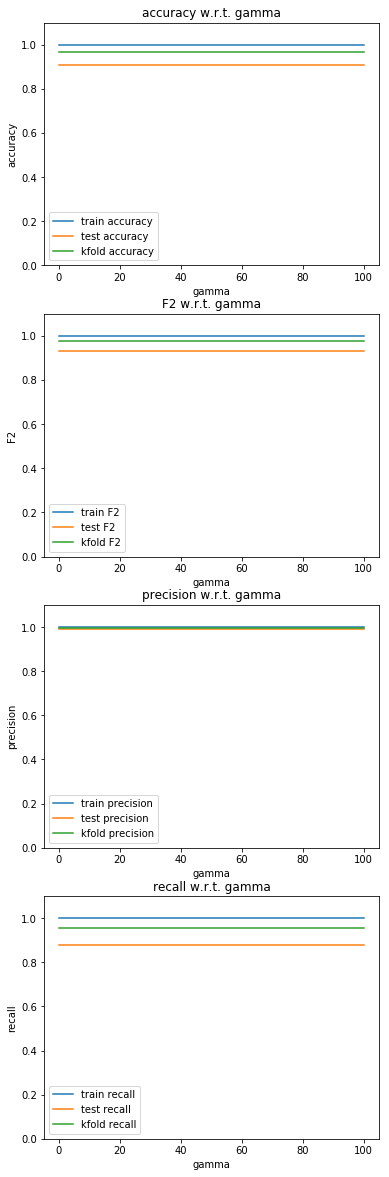

In [41]:
from utils.metrics import VALUE_PARAMETERS

for parameter_i in range(len(VALUE_PARAMETERS)):
    plt.subplot(len(VALUE_PARAMETERS), 1, parameter_i + 1)
    plt.title('{} w.r.t. gamma'.format(VALUE_PARAMETERS[parameter_i]))
    plt.xlabel('gamma')
    plt.ylabel(VALUE_PARAMETERS[parameter_i])
    plt.plot(gammas, [train_error[parameter_i] for train_error in train_errors], label='train {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(gammas, [test_error[parameter_i] for test_error in test_errors], label='test {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.plot(gammas, [cross_val_score[parameter_i] for cross_val_score in cross_val_scores], label='kfold {}'.format(VALUE_PARAMETERS[parameter_i]))
    plt.ylim(0,1.1)
    plt.legend()
    plt.subplots_adjust(top=4)

In [43]:
from utils.metrics import ALL_PARAMETERS
results = []
best_parameter_to_use = 1  # F2


train_final_errors = [train_error[best_parameter_to_use] for train_error in train_errors]
best_train_error = max(train_final_errors)
best_train_error_index = train_final_errors.index(max(train_final_errors))
results.append(list(train_errors[best_train_error_index]))


test_final_errors = [test_error[best_parameter_to_use] for test_error in test_errors]
best_test_error = max(test_final_errors)
best_test_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(test_errors[best_train_error_index]))

kfold_final_errors = [kfold_error[best_parameter_to_use] for kfold_error in cross_val_scores]
best_kfold_error = max(kfold_final_errors)
best_kfold_error_index = test_final_errors.index(max(test_final_errors))
results.append(list(cross_val_scores[best_train_error_index]))

result = pd.DataFrame(results, columns=ALL_PARAMETERS)
result['data'] = ['train', 'test', 'kfold']
result

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>accuracy</th>
      <th>F2</th>
      <th>precision</th>
      <th>recall</th>
      <th>confusion_matrix</th>
      <th>data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>[[1130, 0], [0, 2369]]</td>
      <td>train</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.907621</td>
      <td>0.931153</td>
      <td>0.990842</td>
      <td>0.878247</td>
      <td>[[245, 5], [75, 541]]</td>
      <td>test</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.967239</td>
      <td>0.975579</td>
      <td>0.995490</td>
      <td>0.956449</td>
      <td>[[1367, 13], [130, 2855]]</td>
      <td>kfold</td>
    </tr>
  </tbody>
</table>
</div>

In [45]:
name = 'svm_{}.csv'.format(FEATURES_SOURCE)
result.to_csv('./result/models/{}'.format(name), index=False)